In [3]:
# 매트릭스 구조해석 트러스 계산기

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


In [118]:
# Joint 입력
# Joint 갯수 입력 후 각 Joint의 x, y 좌표 입력

def input_joint():
    print("Joint 갯수를 입력하세요.")
    joint_num = int(input())
    joint = np.zeros((joint_num, 2))
    for i in range(joint_num):
        print("Joint", i + 1, "의 x 좌표를 입력하세요.")
        joint[i][0] = float(input())
        print("Joint", i + 1, "의 y 좌표를 입력하세요.")
        joint[i][1] = float(input())
    return joint


In [119]:
# support data 입력
# support data 입력 후 각 Joint의 x, y 좌표 및 지지형식 입력

def input_support():
    print("Support 갯수를 입력하세요.")
    support_num = int(input())
    support = np.zeros((support_num, 3))
    for i in range(support_num):
        print("Support", i + 1, "의 Joint 번호를 입력하세요.")
        support[i][0] = int(input())
        print("Support", i + 1, "의 x 방향 구속 여부를 적으세요 (맞으면 1, 아니면 0).")
        support[i][1] = float(input())
        print("Support", i + 1, "의 y 방향 구속 여부를 적으세요 (맞으면 1, 아니면 0).")
        support[i][2] = float(input())
    return support



In [120]:
# material property 데이터들 입력
# E 입력
def material_property_base():
    print("사용할 Material의 갯수를 입력하세요.")
    material_num = int(input())
    E = np.zeros(material_num)
    for i in range(material_num):
        print("Material", i + 1, "의 E 값을 입력하세요. (단위는 Pa)")
        E[i] = float(input())
    return E

In [121]:
# cross sectional property data
def material_property_cross():
    print("사용할 Material의 갯수를 입력하세요.")
    material_num = int(input())
    A = np.zeros(material_num)
    for i in range(material_num):
        print("Material", i + 1, "의 A 값을 입력하세요. (단위는 m^2)")
        A[i] = float(input())
    return A

In [122]:
# member data 입력
# member 갯수 입력 후 각 member의 시작 Joint 번호, 끝 Joint 번호, Material
def input_member():
    print("Member 갯수를 입력하세요.")
    member_num = int(input())
    member = np.zeros((member_num, 4))
    for i in range(member_num):
        print("Member", i + 1, "의 시작 Joint 번호를 입력하세요.")
        member[i][0] = int(input())
        print("Member", i + 1, "의 끝 Joint 번호를 입력하세요.")
        member[i][1] = int(input())
        print("Member", i + 1, "의 Material property 번호를 입력하세요.")
        member[i][2] = int(input())
        print("Member", i + 1, "의 Cross sectional property 번호를 입력하세요.")
        member[i][3] = int(input())
    return member

In [123]:
# joint load data
def input_joint_load():
    print("Joint Load 갯수를 입력하세요.")
    joint_load_num = int(input())
    joint_load = np.zeros((joint_load_num, 3))
    for i in range(joint_load_num):
        print("Joint Load", i + 1, "의 Joint 번호를 입력하세요.")
        joint_load[i][0] = int(input())
        print("Joint Load", i + 1, "의 x 방향 Load를 입력하세요.")
        joint_load[i][1] = float(input())
        print("Joint Load", i + 1, "의 y 방향 Load를 입력하세요.")
        joint_load[i][2] = float(input())
    return joint_load

In [124]:
joint_data = input_joint()



Joint 갯수를 입력하세요.
Joint 1 의 x 좌표를 입력하세요.
Joint 1 의 y 좌표를 입력하세요.
Joint 2 의 x 좌표를 입력하세요.
Joint 2 의 y 좌표를 입력하세요.
Joint 3 의 x 좌표를 입력하세요.
Joint 3 의 y 좌표를 입력하세요.


In [125]:
support_data = input_support()

Support 갯수를 입력하세요.
Support 1 의 Joint 번호를 입력하세요.
Support 1 의 x 방향 구속 여부를 적으세요 (맞으면 1, 아니면 0).
Support 1 의 y 방향 구속 여부를 적으세요 (맞으면 1, 아니면 0).
Support 2 의 Joint 번호를 입력하세요.
Support 2 의 x 방향 구속 여부를 적으세요 (맞으면 1, 아니면 0).
Support 2 의 y 방향 구속 여부를 적으세요 (맞으면 1, 아니면 0).


In [126]:
material_property_data = material_property_base()


사용할 Material의 갯수를 입력하세요.
Material 1 의 E 값을 입력하세요. (단위는 Pa)


In [142]:
cross_sectional_data = material_property_cross()

사용할 Material의 갯수를 입력하세요.
Material 1 의 A 값을 입력하세요. (단위는 m^2)


In [144]:
member_data = input_member()

Member 갯수를 입력하세요.
Member 1 의 시작 Joint 번호를 입력하세요.
Member 1 의 끝 Joint 번호를 입력하세요.
Member 1 의 Material property 번호를 입력하세요.
Member 1 의 Cross sectional property 번호를 입력하세요.
Member 2 의 시작 Joint 번호를 입력하세요.
Member 2 의 끝 Joint 번호를 입력하세요.
Member 2 의 Material property 번호를 입력하세요.
Member 2 의 Cross sectional property 번호를 입력하세요.
Member 3 의 시작 Joint 번호를 입력하세요.
Member 3 의 끝 Joint 번호를 입력하세요.
Member 3 의 Material property 번호를 입력하세요.
Member 3 의 Cross sectional property 번호를 입력하세요.


In [129]:
joint_load_data = input_joint_load()

Joint Load 갯수를 입력하세요.
Joint Load 1 의 Joint 번호를 입력하세요.
Joint Load 1 의 x 방향 Load를 입력하세요.
Joint Load 1 의 y 방향 Load를 입력하세요.


In [42]:
# 절점 데이터
#joint_data = [[0., 0.], [8., 0.], [16., 0.], [24., 0.], [8., 6.], [16., 6.]]

# 멤버 데이터
#member_data = [[1., 2., 1., 1.], [2., 3., 1., 1.], [3., 4., 2., 3.], [5., 6., 1., 1.], [2., 5., 1., 1.], [3., 6., 1., 1.], [1., 5., 1., 2.], [2., 6., 1., 2.], [3., 5., 1., 2.], [4., 6., 2., 3.]]


In [145]:
print(joint_data) # ok
print(support_data) 
print(material_property_data)
print(cross_sectional_data)
print(member_data) # ok
print(joint_load_data) # ok

[[ 0.  0.]
 [ 5.  5.]
 [10.  0.]]
[[1. 1. 1.]
 [3. 0. 1.]]
[1000.]
[1.]
[[1. 2. 1. 1.]
 [2. 3. 1. 1.]
 [3. 1. 1. 1.]]
[[  2. 100.   0.]]


In [131]:
# 이미지 로드 함수
def get_image(path, zoom=0.03):
    return OffsetImage(plt.imread(path), zoom=zoom)

# 이미지 경로
pinned_support_path = 'pinned support.png'
roller_support_path = 'roller support.png'

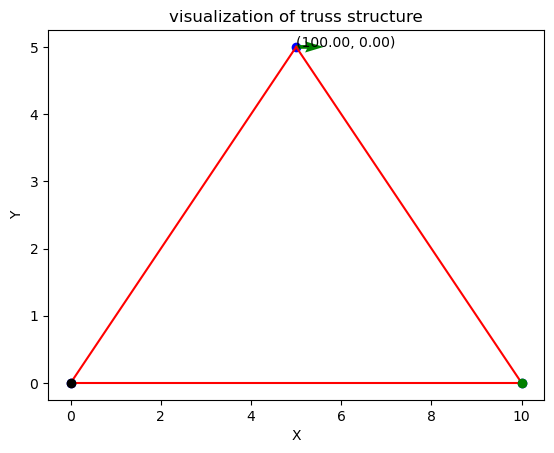

In [146]:
# joint data와 member data를 갖고 어떻게 시각화를 할 것인지?
# 절점을 플롯
for joint in joint_data:
    plt.scatter(joint[0], joint[1], color='blue')

# 멤버를 그림
for member in member_data:
    start_joint = joint_data[int(member[0]) - 1]
    end_joint = joint_data[int(member[1]) - 1]
    plt.plot([start_joint[0], end_joint[0]], [start_joint[1], end_joint[1]], color='red')

# 절점 하중을 그림
for load in joint_load_data:
    joint = joint_data[int(load[0]) - 1]
    plt.quiver(joint[0], joint[1], load[1], load[2], color='green')
    plt.text(joint[0], joint[1], f'({load[1]:.2f}, {load[2]:.2f})', color='black')


# 지지조건 그림을 가져와서 추가함.
for support in support_data:
    joint = joint_data[int(support[0]) - 1]
    y_offset = 0.5


    if (support[1] == 1 and support[2] == 1): # pinned support
        plt.scatter(joint[0], joint[1], color='black', zorder=10)
        #plt.gca().add_artist(get_image(roller_support_path))

    if (support[1] == 1 and support[2] == 0): # roller support (upper)
        plt.scatter(joint[0], joint[1], color='green', zorder=10)
        #plt.gca().add_artist(get_image(roller_support_path))

    if (support[1] == 0 and support[2] == 1): # roller support (side)
        plt.scatter(joint[0], joint[1], color='green', zorder=10)
        #plt.gca().add_artist(get_image(roller_support_path))





plt.xlabel('X')
plt.ylabel('Y')
plt.title('visualization of truss structure')
plt.show()



In [147]:
# DOF 계산기 (Degree Of freedom)
# 2 * number of joints - Number of Reaction Force at Support

def DOF_calculator(joint_data, support_data):
    DOF = 2 * len(joint_data)
    for support in support_data:
        DOF -= support[1] + support[2]
    return int(DOF)

print(DOF_calculator(joint_data, support_data))



3


In [150]:
# Indeterminancy 계산기
# member 갯수 + number of reaction force at support - 2 * joint 갯수

def indeterminancy_calculator(member_data, support_data, joint_data):
    indeterminancy = len(member_data) + sum(support_data[:, 1:3].flatten()) - 2 * len(joint_data)
    return int(indeterminancy)

print(indeterminancy_calculator(member_data, support_data, joint_data))

0


In [192]:
# 전역 구조행렬을 제작하는 함수.
# 국소적 멤버의 구조행렬 형태
# [P]=[K][u]
# [p] : joint load data로부터,

# [P] 입력하기
# 결과 벡터의 크기 계산, joint_data의 행의 크기에 2배를 한 것.
max_index = len(joint_data)
result_vector_size = max_index * 2  # x, y 방향 고려
# 결과 벡터 초기화 (부동소수점 타입으로)
Force_Vector = np.full(result_vector_size, np.nan)  # 모든 값을 np.nan으로 초기화
# joint_load_data 순회하며 결과 벡터 채우기
for load in joint_load_data:
    index = int(load[0]) - 1  # Python 인덱스는 0부터 시작
    Force_Vector[index * 2] = load[1]  # x 방향 하중 할당 (0 포함)
    Force_Vector[index * 2 + 1] = load[2]  # y 방향 하중 할당 (0 포함)
# 또한 지지조건 순회하면서 P 벡터 채우기)
for support in support_data:
    index = int(support[0]) - 1
    if support[1] == 0:  # x 방향 구속
        Force_Vector[index * 2] = 0
    if support[2] == 0:  # y 방향 구속
        Force_Vector[index * 2 + 1] = 0

# 결과 출력
print(Force_Vector)

[ nan  nan 100.   0.   0.  nan]


In [193]:
# [K] : 각 멤버의 구조행렬을 합친 전역 구조행렬
# stiffness matrix의 크기 계산, joint_data의 행의 크기에 2배를 한 것이 둘 다 행렬이 됩니다.
max_index = len(joint_data)
Stiffness_Matrix = np.zeros((max_index * 2, max_index * 2))  # 0으로 초기화된 행렬 생성

# 각 멤버의 방향 벡터를 계산(cos, sin)
for member in member_data:
    member_start = joint_data[int(member[0]) - 1]
    member_end = joint_data[int(member[1]) - 1]
    dx = member_end[0] - member_start[0]
    dy = member_end[1] - member_start[1]
    length = np.sqrt(dx ** 2 + dy ** 2)
    cos = dx / length
    sin = dy / length

    # 각 멤버의 구조행렬 계산
    A = cross_sectional_data[int(member[3]) - 1]
    E = material_property_data[int(member[2]) - 1]
    k = A * E / length
    local_stiffness_matrix = np.array([[cos ** 2, cos * sin, -cos ** 2, -cos * sin],
                                       [cos * sin, sin ** 2, -cos * sin, -sin ** 2],
                                       [-cos ** 2, -cos * sin, cos ** 2, cos * sin],
                                       [-cos * sin, -sin ** 2, cos * sin, sin ** 2]]) * k


    # 전역 구조행렬에 더하기 (전역 행렬은 112233445566 이런 식으로 2n * 2n 행렬로 되어있음.)
    # 즉 member_data의 member_start, member_end 가 있는데,
    # member[0]과 member[1]을 정수형으로 변환
    member_start_index = int(member[0]) - 1
    member_end_index = int(member[1]) - 1

    # 변환된 인덱스를 사용하여 Stiffness_Matrix 업데이트
    Stiffness_Matrix[2*member_start_index][2*member_start_index] += local_stiffness_matrix[0][0]
    Stiffness_Matrix[2*member_start_index+1][2*member_start_index] += local_stiffness_matrix[1][0]
    Stiffness_Matrix[2*member_start_index][2*member_start_index+1] += local_stiffness_matrix[0][1]
    Stiffness_Matrix[2*member_start_index+1][2*member_start_index+1] += local_stiffness_matrix[1][1]

    Stiffness_Matrix[2*member_end_index][2*member_end_index] += local_stiffness_matrix[2][2]
    Stiffness_Matrix[2*member_end_index+1][2*member_end_index] += local_stiffness_matrix[3][2]
    Stiffness_Matrix[2*member_end_index][2*member_end_index+1] += local_stiffness_matrix[2][3]
    Stiffness_Matrix[2*member_end_index+1][2*member_end_index+1] += local_stiffness_matrix[3][3]

    Stiffness_Matrix[2*member_start_index][2*member_end_index] += local_stiffness_matrix[0][2]
    Stiffness_Matrix[2*member_start_index+1][2*member_end_index] += local_stiffness_matrix[1][2]
    Stiffness_Matrix[2*member_start_index][2*member_end_index+1] += local_stiffness_matrix[0][3]
    Stiffness_Matrix[2*member_start_index+1][2*member_end_index+1] += local_stiffness_matrix[1][3]

    Stiffness_Matrix[2*member_end_index][2*member_start_index] += local_stiffness_matrix[2][0]
    Stiffness_Matrix[2*member_end_index+1][2*member_start_index] += local_stiffness_matrix[3][0]
    Stiffness_Matrix[2*member_end_index][2*member_start_index+1] += local_stiffness_matrix[2][1]
    Stiffness_Matrix[2*member_end_index+1][2*member_start_index+1] += local_stiffness_matrix[3][1]

print(Stiffness_Matrix)

[[ 170.71067812   70.71067812  -70.71067812  -70.71067812 -100.
     0.        ]
 [  70.71067812   70.71067812  -70.71067812  -70.71067812    0.
     0.        ]
 [ -70.71067812  -70.71067812  141.42135624    0.          -70.71067812
    70.71067812]
 [ -70.71067812  -70.71067812    0.          141.42135624   70.71067812
   -70.71067812]
 [-100.            0.          -70.71067812   70.71067812  170.71067812
   -70.71067812]
 [   0.            0.           70.71067812  -70.71067812  -70.71067812
    70.71067812]]


In [194]:
# [u] : 각 절점의 변위를 나타내는 벡터
#[[1. 1. 1.]
# [3. 0. 1.]
# [4. 0. 1.]]

max_index = len(joint_data)
result_vector_size = max_index * 2  # x, y 방향 고려
Displacement_Vector = np.full(result_vector_size, np.nan)  # 모든 값을 np.nan으로 초기화
# support_data 순회하며 결과 벡터 채우기
for support in support_data:
    index = int(support[0]) - 1  # Python 인덱스는 0부터 시작
    if support[1] == 1:  # x 방향 구속
        Displacement_Vector[index * 2] = 0  # x 방향 변위 0으로 할당
    if support[2] == 1:  # y 방향 구속
        Displacement_Vector[index * 2 + 1] = 0  # y 방향 변위 0으로 할당

print(Displacement_Vector)

[ 0.  0. nan nan nan  0.]


In [195]:
# 가우스 조르단 방법을 사용하여 P=KU에서 NAN 값을 모두 구하여 P, U 벡터를 구해냄.
# NAN 값을 가진 인덱스를 찾아내는 함수

# 우선 nan 값을 가진 인덱스를 displacement_vector에서 찾아내고 역행렬을 구하여서 빈 nan 값을 갱신하고
# 그 다음에 Force_Vector의 빈칸을 구한다.

print(Force_Vector)
print(Stiffness_Matrix)
print(Displacement_Vector)

# Force_Vector 중에서, nan이 아닌 값들을 찾아서 그 인덱스를 추출

def find_nan_index(vector):
    index = []
    for i in range(len(vector)):
        if np.isnan(vector[i]):
            index.append(i)
    return index

def find_non_nan_index(vector):
    index = []
    for i in range(len(vector)):
        if not np.isnan(vector[i]):
            index.append(i)
    return index

nan_index_Force_Vector = find_nan_index(Force_Vector)
non_nan_index_Force_Vector = find_non_nan_index(Force_Vector)

# 그 다음에 Stiffness_Matrix에서 nan 열들을 가지지 않은 것들을 추출해서 역행렬을 구합니다.
# 이 역행렬을 이용해서 Displacement_Vector의 nan 값을 구합니다.

print(nan_index_Force_Vector)
print(non_nan_index_Force_Vector)


# 행과 열이 non_nan_index_Force_Vector 인 것을 추출하여 새로운 부분적인 행렬을 만들어냅니다.
# 이 부분적인 행렬을 이용해서 역행렬을 구합니다.

Stiffness_Matrix_partial = Stiffness_Matrix[np.ix_(non_nan_index_Force_Vector, non_nan_index_Force_Vector)]

# 여기서 역행렬을 구합니다.
Stiffness_Matrix_partial_inv = np.linalg.inv(Stiffness_Matrix_partial)


[ nan  nan 100.   0.   0.  nan]
[[ 170.71067812   70.71067812  -70.71067812  -70.71067812 -100.
     0.        ]
 [  70.71067812   70.71067812  -70.71067812  -70.71067812    0.
     0.        ]
 [ -70.71067812  -70.71067812  141.42135624    0.          -70.71067812
    70.71067812]
 [ -70.71067812  -70.71067812    0.          141.42135624   70.71067812
   -70.71067812]
 [-100.            0.          -70.71067812   70.71067812  170.71067812
   -70.71067812]
 [   0.            0.           70.71067812  -70.71067812  -70.71067812
    70.71067812]]
[ 0.  0. nan nan nan  0.]
[0, 1, 5]
[2, 3, 4]


In [196]:
# 행렬곱을 위해서 displacement 벡터와 force 벡터를 갖고옵니다.
Displacement_Vector_partial = Displacement_Vector[non_nan_index_Force_Vector]
Force_Vector_partial = Force_Vector[non_nan_index_Force_Vector]

# 그리고 이 역행렬을 이용해서 Displacement_Vector의 nan 값을 구합니다.
Displacement_Vector_partial = np.dot(Stiffness_Matrix_partial_inv, Force_Vector_partial)

print(Displacement_Vector_partial)


[ 0.95710678 -0.25        0.5       ]


In [199]:
# 이제 이 값을 Displacement_Vector에 넣어줍니다.
# 이것을 기존 displacement_vector와 합칩니다. nan이 없도록.

for i in range(len(Displacement_Vector_partial)):
    Displacement_Vector[non_nan_index_Force_Vector[i]] = Displacement_Vector_partial[i]

print(Displacement_Vector)

# 이제 이 값을 이용해서 Force_Vector의 nan 값을 구합니다.
Force_Vector = np.dot(Stiffness_Matrix, Displacement_Vector)
print(Force_Vector)


[ 0.          0.          0.95710678 -0.25        0.5         0.        ]
[-100.  -50.  100.    0.    0.   50.]


c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\quiver.py:645: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


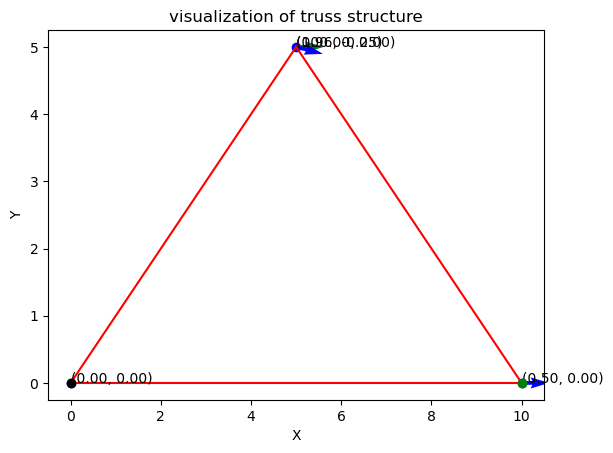

In [200]:
# 시각화
# 절점을 플롯
for joint in joint_data:
    plt.scatter(joint[0], joint[1], color='blue')

# 멤버를 그림
for member in member_data:
    start_joint = joint_data[int(member[0]) - 1]
    end_joint = joint_data[int(member[1]) - 1]
    plt.plot([start_joint[0], end_joint[0]], [start_joint[1], end_joint[1]], color='red')

# 절점 하중을 그림
for load in joint_load_data:
    joint = joint_data[int(load[0]) - 1]
    plt.quiver(joint[0], joint[1], load[1], load[2], color='green')
    plt.text(joint[0], joint[1], f'({load[1]:.2f}, {load[2]:.2f})', color='black')

# 변위를 그림
for i in range(len(joint_data)):
    plt.quiver(joint_data[i][0], joint_data[i][1], Displacement_Vector[i * 2], Displacement_Vector[i * 2 + 1], color='blue')
    plt.text(joint_data[i][0], joint_data[i][1], f'({Displacement_Vector[i * 2]:.2f}, {Displacement_Vector[i * 2 + 1]:.2f})', color='black')

# 지지조건 그림을 가져와서 추가함.
for support in support_data:
    joint = joint_data[int(support[0]) - 1]
    y_offset = 0.5

    if (support[1] == 1 and support[2] == 1): # pinned support
        plt.scatter(joint[0], joint[1], color='black', zorder=10)
        #plt.gca().add_artist(get_image(roller_support_path))

    if (support[1] == 1 and support[2] == 0): # roller support (upper)
        plt.scatter(joint[0], joint[1], color='green', zorder=10)
        #plt.gca().add_artist(get_image(roller_support_path))

    if (support[1] == 0 and support[2] == 1): # roller support (side)
        plt.scatter(joint[0], joint[1], color='green', zorder=10)
        #plt.gca().add_artist(get_image(roller_support_path))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('visualization of truss structure')
plt.show()
